In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train_data_path="/content/drive/My Drive/data/Project 3-Retail-Datasets/test_data_hidden.csv"
test_data_path="/content/drive/My Drive/data/Project 3-Retail-Datasets/test_data.csv"

In [ ]:
train_data=pd.read_csv(train_data_path)
test_data=pd.read_csv(test_data_path)

In [ ]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Project Task: Week 1



In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34565 entries, 0 to 34564
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          34565 non-null  int64 
 1   DayOfWeek      34565 non-null  int64 
 2   Date           34565 non-null  object
 3   Sales          34565 non-null  int64 
 4   Customers      34565 non-null  int64 
 5   Open           34565 non-null  int64 
 6   Promo          34565 non-null  int64 
 7   StateHoliday   34565 non-null  int64 
 8   SchoolHoliday  34565 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 2.4+ MB


In [ ]:
train_data.isnull().sum() #no null value identified

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
#feature Engineering
train_data.Date.tail()

34560    2015-07-01
34561    2015-07-01
34562    2015-07-01
34563    2015-07-01
34564    2015-07-01
Name: Date, dtype: object

In [ ]:
year=[]
month=[]
dte=[]

for dates in train_data.Date:
  
  date=str(dates)
  date=date.split("-")
  year.append(int(date[0]))
  month.append(int(date[1]))
  dte.append(int(date[2][:2]))


In [ ]:
date=pd.DataFrame(dte)
month=pd.DataFrame(month)
year=pd.DataFrame(year)
train_data.drop(["Date"],axis=1,inplace=True)
train_data.insert(loc=2,value=dte,column="Date")
train_data.insert(loc=3,value=month,column="Month")
train_data.insert(loc=4,value=year,column="Year")

In [ ]:
#Removing all thestore whose sales is 0 as they would not contribute while predicting Sales for a new point

train_data=train_data.loc[train_data.Sales>0]

In [ ]:
train_data.info() #sucessfully converted the time frame into Date Month and Year 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30188 entries, 0 to 34564
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store          30188 non-null  int64
 1   DayOfWeek      30188 non-null  int64
 2   Date           30188 non-null  int64
 3   Month          30188 non-null  int64
 4   Year           30188 non-null  int64
 5   Sales          30188 non-null  int64
 6   Customers      30188 non-null  int64
 7   Open           30188 non-null  int64
 8   Promo          30188 non-null  int64
 9   StateHoliday   30188 non-null  int64
 10  SchoolHoliday  30188 non-null  int64
dtypes: int64(11)
memory usage: 2.8 MB


**Exploratory Data Analysis**

In [ ]:
#identifying the sales per Store
train_data_gb_Store=train_data.groupby(["Store"]).sum()

In [ ]:
train_data_gb_Store.head()
Store=train_data_gb_Store.index
Sales=train_data_gb_Store.Sales

In [ ]:
train_data_gb_Store.Sales.sort_values(ascending=False).head(3)

Store
262     673633
1114    626588
817     563573
Name: Sales, dtype: int64

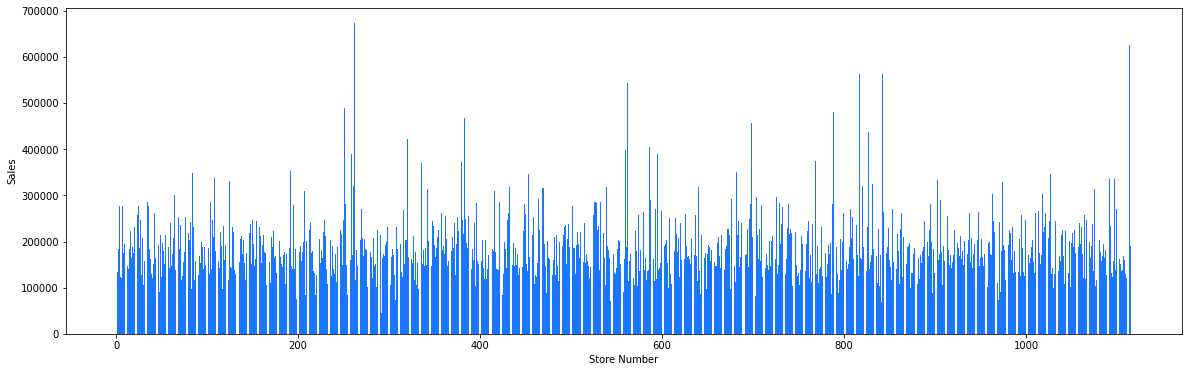

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.bar(Store,Sales,color="#1a75ff")
plt.xlabel("Store Number")
plt.ylabel("Sales")
plt.show()

Now as per the observation top 3 stores with maximum Sales are 

**Store**

262       
1114      
817       

In [ ]:
#identify the sales per Dates
train_data_gb_Date=train_data.groupby(["Date"]).sum()

In [ ]:
dates=train_data_gb_Date.index
Sales=train_data_gb_Date.Sales

In [ ]:
train_data_gb_Date.Sales.sort_values(ascending=False).head(3)

Date
13    10841267
27    10707292
31    10109742
Name: Sales, dtype: int64

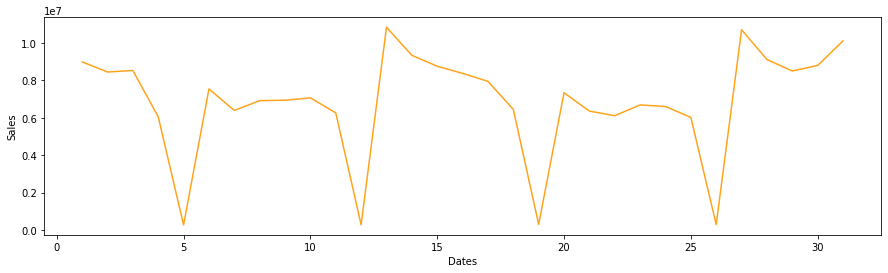

In [ ]:
fig=plt.gcf()
fig.set_size_inches(15,4)
plt.plot(dates,Sales,color="#ffa31a")
plt.xlabel("Dates")
plt.ylabel("Sales")
plt.show()



Now as per the observation top 3 Dates with maximum Sales are 

**Dates**

      
1.   13
2.   27
3.   31 
      


In [ ]:
#identify Sales as per School Holiday

train_data_gb_SchoolHoliday=train_data.groupby(["SchoolHoliday"]).sum()
train_data_gb_SchoolHoliday


,Store,DayOfWeek,Date,Month,Year,Sales,Customers,Open,Promo,StateHoliday
SchoolHoliday,,,,,,,,,,
0,9649358,68015,227801,122192,35173840,117563778,12332330,17456,6666,0
1,7194023,39763,257248,89124,25654980,94758838,9921558,12732,7805,0


In [ ]:
sales=train_data_gb_SchoolHoliday.Sales


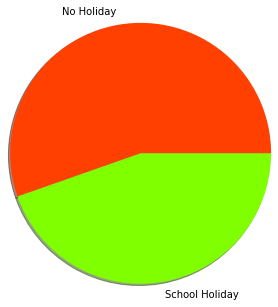

In [ ]:

group=["No Holiday","School Holiday"]
color=["#ff4000", "#80ff00"]
fig=plt.gcf()
plt.pie(sales,colors=color,shadow=True,radius=1.5,labels=group)
plt.show()

As per the Observation maximum sales occurs when there is no School Holiday

In [ ]:
#identify Sales as per the promo
train_data_gb_Promo=train_data.groupby(["Promo"]).sum()
train_data_gb_Promo

,Store,DayOfWeek,Date,Month,Year,Sales,Customers,Open,StateHoliday,SchoolHoliday
Promo,,,,,,,,,,
0,8770586,61026,233537,110019,31669755,93864321,10619080,15717,0,4927
1,8072795,46752,251512,101297,29159065,118458295,11634808,14471,0,7805


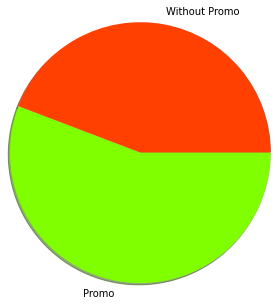

In [ ]:
Sales=train_data_gb_Promo.Sales
groups=["Without Promo","Promo"]
plt.pie(Sales,labels=groups,radius=1.5,shadow=True,colors=color)
plt.show()

**We can clearly see the Impact od the Promo over the Sales**





**Apply Linear Regression**

In [ ]:
#Train a single model for all stores, using storeId as a feature

features=pd.concat([train_data.iloc[:,:4],train_data.iloc[:,6:]],axis=1, join='inner')
labels=train_data.iloc[:,5:6]

In [ ]:
features.drop(["Customers"],axis=1,inplace=True)
features.head()

,Store,DayOfWeek,Date,Month,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31,7,1,1,0,1
1,2,5,31,7,1,1,0,1
2,3,5,31,7,1,1,0,1
3,4,5,31,7,1,1,0,1
4,5,5,31,7,1,1,0,1


In [ ]:
features.shape

(30188, 8)

In [ ]:
features_values=features.iloc[:].values

In [ ]:
labels_values=labels.iloc[:,0:1].values

In [ ]:
features.shape

(30188, 8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_values,labels_values,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics_calulation(y_pred,y_test):
  mse=mean_squared_error(y_pred,y_test)
  rmse=math.sqrt(mse)
  mae=mean_absolute_error(y_pred,y_test)
  rsqr=r2_score(y_pred=y_pred,y_true=y_test)
  return(mse,rmse,mae,rsqr)


In [ ]:
mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
print("Mean Squared Error:      ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absloute Error:     ",mae)
print("R-Squared Error:          ",rsqr)

Mean Squared Error:       7512958.441794213
Root Mean Squared Error:  2740.9776434320315
Mean Absloute Error:      1970.671814961416
R-Squared Error:           0.14246374495346237


**As per the Different Metrics We can Identify that the model is not performing that good as it should**

In [ ]:
#Training separate model for each store.
store_wise_=features.loc[train_data.Store==1]
store_list=np.arange(1,1116)
seprate_models=[]
store_wise_mse=[]
store_wise_rmse=[]
store_wise_mae=[]
store_wise_rsqr=[]
for i in range(1,len(store_list)+1):
  store_wise_data=0
  store_wise_features=features.loc[train_data.Store==i].values
  store_wise_labels=train_data.Sales.loc[train_data.Store==i].values
  store_wise_labels=store_wise_labels.reshape(-1,1)

  X_train,X_test,y_train,y_test=train_test_split(store_wise_features,store_wise_labels,test_size=0.2,random_state=0)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  seprate_models.append(lr)
  y_pred=lr.predict(X_test)
  mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
  store_wise_mse.append(mse)
  store_wise_rmse.append(rmse)
  store_wise_mae.append(mae)
  store_wise_rsqr.append(rsqr)
   



In [ ]:
#now averaging the metrics 
avg_store_wise_mse=sum(store_wise_mse)/1115
avg_store_wise_rmse=sum(store_wise_rmse)/1115
avg_store_wise_mae=sum(store_wise_mae)/1115
avg_store_wise_rsqr=sum(store_wise_rsqr)/1115


In [ ]:

print("Average of Mean Squared Error     :",avg_store_wise_mse)
print("Average of Root Mean Squared Error:",avg_store_wise_rmse)
print("Average of Mean Absolute Error    :",avg_store_wise_mae)
print("Average of R-Squared Score        :",avg_store_wise_rsqr)




Average of Mean Squared Error     : 1218543.8342645324
Average of Root Mean Squared Error: 991.8696559859129
Average of Mean Absolute Error    : 841.3963208211351
Average of R-Squared Score        : -0.7616857558369184


**Now the difference of performance is huge We can clearly see that our store wise model performance is far better than single short model**

The reason why it performs so better from the single short model because it learns the partten store wise and it also makes sense because each store has different partten for the sales

**Ensemble of all the models**

**voting Regressors**

In [ ]:
estimator=[]
i=0
for spm in seprate_models:
  zipped=("spm"+str(i),spm)
  estimator.append(zipped)
  i=i+1
  


In [ ]:
#voting Regressors
from sklearn.ensemble import VotingRegressor

estimator.append(('regressor',regressor))
vregressor=VotingRegressor(estimators=estimator)

In [ ]:
features_ensemble_values=features.iloc[:].values
labels_ensemble_values=labels.iloc[:,0:1].values


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features_ensemble_values,labels_ensemble_values,test_size=0.3,random_state=0)

In [ ]:
vregressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('spm0',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('spm1',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('spm2',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('spm3',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=N...
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('spm27',
                             LinearRegression(cop

In [ ]:
y_pred=vregressor.predict(X_test)

In [ ]:
mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
print("Mean Squared Error:      ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absloute Error:     ",mae)
print("R-Squared Error:          ",rsqr)

Mean Squared Error:       7216560.453312286
Root Mean Squared Error:  2686.36565889908
Mean Absloute Error:      1943.549744499989
R-Squared Error:           0.15644125872391768


We are not geeting a few better performance from normal Linear Regression Model, but not better than the seprate models, as the ensamble of group of linear model will remain the linear as itself and can not determine the Non-Linear partten

**Using Regularized Regression**

In [ ]:
from sklearn.linear_model import ElasticNet


In [ ]:
elsaticnet=ElasticNet(l1_ratio=0.6,alpha=0.5,tol=0.0002)

In [ ]:
elsaticnet.fit(X_train,y_train)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0002, warm_start=False)

In [ ]:
y_preda=elsaticnet.predict(X_test)

In [ ]:
mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
print("Mean Squared Error:      ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absloute Error:     ",mae)
print("R-Squared Error:          ",rsqr)

Mean Squared Error:       7216560.453312286
Root Mean Squared Error:  2686.36565889908
Mean Absloute Error:      1943.549744499989
R-Squared Error:           0.15644125872391768


**This is performing better than a linear single short model**

**Other Regression Techniques:**

When store is closed, that means sales = 0 then they will not help us to find the partten among the data so we need to remove such data points so that we can get only data points for the Store which are currently active and that will help us to gain some partten among them, that is the reason i have deleted those in early stage of this project.

In [ ]:
#using Decission Tree Regression

from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtregressor=DecisionTreeRegressor(max_depth=20)

In [ ]:
dtregressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=dtregressor.predict(X_test)

In [ ]:
mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
print("Mean Squared Error:      ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absloute Error:     ",mae)
print("R-Squared Error:          ",rsqr)

Mean Squared Error:       6251518.258918545
Root Mean Squared Error:  2500.3036333450673
Mean Absloute Error:      1704.2313021859193
R-Squared Error:           0.2692470453653152


# **Going to Use GridSearch Fine Tunning approach to identify the best Combination of the Parameters**

In [ ]:
max_depth=[15,20,25,30,40,50,55,60]
min_samples_leaf=[1,2,3,4,5,6,7,8]
min_samples_split=[2,3,4,5,6,7,8,9]

hyperparameter=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)

In [ ]:
dtoptimized=DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
randomsearch=GridSearchCV(dtoptimized,hyperparameter)

In [ ]:
randomsearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [15, 20, 25, 30, 40, 50, 55, 60],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
         

In [ ]:
randomsearch.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 7}

In [ ]:
optimizeDT=DecisionTreeRegressor(max_depth=50,min_samples_leaf=2,min_samples_split=7)

In [ ]:
optimizeDT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=optimizeDT.predict(X_test)

In [ ]:
mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
print("Mean Squared Error:      ",mse)
print("Root Mean Squared Error: ",rmse)
print("Mean Absloute Error:     ",mae)
print("R-Squared Error:          ",rsqr)

Mean Squared Error:       5823437.4168178085
Root Mean Squared Error:  2413.179938756704
Mean Absloute Error:      1624.3500901696661
R-Squared Error:           0.31928630418717663


**We Can see that R squared Score imporoves Drametically**

**Now Training model for each seprate Store**

In [ ]:
#Training separate model for each store.
store_wise_=features.loc[train_data.Store==1]
store_list=np.arange(1,1116)
seprate_models_tree=[]
store_wise_mse_tree=[]
store_wise_rmse_tree=[]
store_wise_mae_tree=[]
store_wise_rsqr_tree=[]
for i in range(1,len(store_list)+1):
  store_wise_data=0
  store_wise_features=features.loc[train_data.Store==i].values
  store_wise_labels=train_data.Sales.loc[train_data.Store==i].values
  store_wise_labels=store_wise_labels.reshape(-1,1)

  X_train,X_test,y_train,y_test=train_test_split(store_wise_features,store_wise_labels,test_size=0.2,random_state=0)
  dt=DecisionTreeRegressor(max_depth=50,min_samples_leaf=2,min_samples_split=2)
  dt.fit(X_train,y_train)
  seprate_models_tree.append(dt)
  y_pred=dt.predict(X_test)
  mse,rmse,mae,rsqr=metrics_calulation(y_pred,y_test)
  store_wise_mse_tree.append(mse)
  store_wise_rmse_tree.append(rmse)
  store_wise_mae_tree.append(mae)
  store_wise_rsqr_tree.append(rsqr)
   

In [ ]:
avg_store_wise_mse=sum(store_wise_mse_tree)/1115
avg_store_wise_rmse=sum(store_wise_rmse_tree)/1115
avg_store_wise_mae=sum(store_wise_mae_tree)/1115
avg_store_wise_rsqr=sum(store_wise_rsqr_tree)/1115


In [ ]:

print("Average of Mean Squared Error     :",avg_store_wise_mse)
print("Average of Root Mean Squared Error:",avg_store_wise_rmse)
print("Average of Mean Absolute Error    :",avg_store_wise_mae)
print("Average of R-Squared Score        :",avg_store_wise_rsqr)




Average of Mean Squared Error     : 1342143.2980817144
Average of Root Mean Squared Error: 1038.5645700460323
Average of Mean Absolute Error    : 884.0605879422029
Average of R-Squared Score        : -0.5094962331491666
